In [151]:
!pip install requests beautifulsoup4 pandas lxml
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [152]:
# Get the webpage content
url = "https://www.bbc.com/news/world"
response = requests.get(url)

In [153]:
# Check if request was successful
print(response)

<Response [200]>


In [154]:
# Parse with BeautifulSoup
soup = BeautifulSoup(response.content, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   World | Latest News &amp; Updates | BBC News
  </title>
  <meta content="World | Latest News &amp; Updates | BBC News" property="og:title"/>
  <meta content="World | Latest News &amp; Updates | BBC News" name="twitter:title"/>
  <meta content="Get all the latest news, live updates and content about the World from across the BBC." name="description"/>
  <meta content="Get all the latest news, live updates and content about the World from across the BBC." property="og:description"/>
  <meta content="Get all the latest news, live updates and content about the World from across the BBC." name="twitter:description"/>
  <meta content="#da532c" name="msapplication-TileColor"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="NOODP, NOYDIR" name="robots"/>
  <link href="/bbcx/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <li

In [155]:
# Extract the relevant data
articles = soup.find_all('div', {'data-testid': ['edinburgh-card', 'dundee-card', 'manchester-card', 'london-card', 'virginia-section-7']})

data = []

for article in articles:
    # Extract the headline
    headline_tag = article.find('h2', {'data-testid': 'card-headline'})
    headline_text = headline_tag.get_text(strip=True) if headline_tag else None

    # Extract the category/tag
    category_tag = article.find('span', {'data-testid': 'card-metadata-tag'})
    category_text = category_tag.get_text(strip=True) if category_tag else None

    # Extract the timestamp
    timestamp_tag = article.find('span', {'data-testid': 'card-metadata-lastupdated'})
    timestamp_text = timestamp_tag.get_text(strip=True) if timestamp_tag else None

    # Author information is not available in the provided snippet, so we'll leave it as None
    author_text = None

    # Append the extracted data
    data.append({
        'Headline': headline_text,
        'Category': category_text,
        'Author': author_text,
        'Timestamp': timestamp_text
    })


df = pd.DataFrame(data)


In [156]:
df

,Headline,Category,Author,Timestamp
0,"Four killed by tornadoes in Florida, as DeSant...",US & Canada,None,31 mins ago
1,"Four killed by tornadoes in Florida, as DeSant...",None,None,None
2,Where is Hurricane Milton now?,US & Canada,None,31 mins ago
3,Israeli strike on Gaza school sheltering displ...,Middle East,None,4 hrs ago
4,Portugal tries to tempt under-35s with tax cuts,Europe,None,50 mins ago
5,Tennis legend Nadal to retire in November,Tennis,None,Just now
6,Where is Hurricane Milton now?,US & Canada,None,31 mins ago
7,"'My anxiety's through the roof,' says woman wh...",US & Canada,None,3 hrs ago
8,UN says peacekeepers injured after Israeli tan...,None,None,None
9,Israeli strike on Gaza school sheltering displ...,Middle East,None,4 hrs ago


In [157]:
# Drop the 'Author' column
df.drop(columns=['Author'], inplace=True)

In [158]:
df

,Headline,Category,Timestamp
0,"Four killed by tornadoes in Florida, as DeSant...",US & Canada,31 mins ago
1,"Four killed by tornadoes in Florida, as DeSant...",None,None
2,Where is Hurricane Milton now?,US & Canada,31 mins ago
3,Israeli strike on Gaza school sheltering displ...,Middle East,4 hrs ago
4,Portugal tries to tempt under-35s with tax cuts,Europe,50 mins ago
5,Tennis legend Nadal to retire in November,Tennis,Just now
6,Where is Hurricane Milton now?,US & Canada,31 mins ago
7,"'My anxiety's through the roof,' says woman wh...",US & Canada,3 hrs ago
8,UN says peacekeepers injured after Israeli tan...,None,None
9,Israeli strike on Gaza school sheltering displ...,Middle East,4 hrs ago


In [159]:
# Conversion of Timestamp to Date-Time format
from datetime import datetime, timedelta

def convert_to_datetime(timestamp):
    if pd.isna(timestamp) or "Just" in timestamp:
        return datetime.now().strftime('%d/%m/%Y %H:%M:%S')
    value, unit = timestamp.split()[:2]
    delta = timedelta(minutes=int(value)) if 'min' in unit else timedelta(hours=int(value))
    return (datetime.now() - delta).strftime('%d/%m/%Y %H:%M:%S')

# Apply conversion and drop NaNs
df['Timestamp'] = df['Timestamp'].apply(convert_to_datetime)

In [160]:
df

,Headline,Category,Timestamp
0,"Four killed by tornadoes in Florida, as DeSant...",US & Canada,10/10/2024 15:23:42
1,"Four killed by tornadoes in Florida, as DeSant...",None,10/10/2024 15:54:42
2,Where is Hurricane Milton now?,US & Canada,10/10/2024 15:23:42
3,Israeli strike on Gaza school sheltering displ...,Middle East,10/10/2024 11:54:42
4,Portugal tries to tempt under-35s with tax cuts,Europe,10/10/2024 15:04:42
5,Tennis legend Nadal to retire in November,Tennis,10/10/2024 15:54:42
6,Where is Hurricane Milton now?,US & Canada,10/10/2024 15:23:42
7,"'My anxiety's through the roof,' says woman wh...",US & Canada,10/10/2024 12:54:42
8,UN says peacekeepers injured after Israeli tan...,None,10/10/2024 15:54:42
9,Israeli strike on Gaza school sheltering displ...,Middle East,10/10/2024 11:54:42


In [161]:
# Drop rows where either 'Category' or 'Timestamp' is NaN or empty
df = df.dropna(subset=['Category', 'Timestamp']).reset_index(drop=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Headline   22 non-null     object
 1   Category   22 non-null     object
 2   Timestamp  22 non-null     object
dtypes: object(3)
memory usage: 656.0+ bytes


In [163]:
df

,Headline,Category,Timestamp
0,"Four killed by tornadoes in Florida, as DeSant...",US & Canada,10/10/2024 15:23:42
1,Where is Hurricane Milton now?,US & Canada,10/10/2024 15:23:42
2,Israeli strike on Gaza school sheltering displ...,Middle East,10/10/2024 11:54:42
3,Portugal tries to tempt under-35s with tax cuts,Europe,10/10/2024 15:04:42
4,Tennis legend Nadal to retire in November,Tennis,10/10/2024 15:54:42
5,Where is Hurricane Milton now?,US & Canada,10/10/2024 15:23:42
6,"'My anxiety's through the roof,' says woman wh...",US & Canada,10/10/2024 12:54:42
7,Israeli strike on Gaza school sheltering displ...,Middle East,10/10/2024 11:54:42
8,Russian strike kills eight in fresh attack on ...,Europe,10/10/2024 11:54:42
9,Human rights advocate Ethel Kennedy dies at 96,US & Canada,10/10/2024 15:45:42


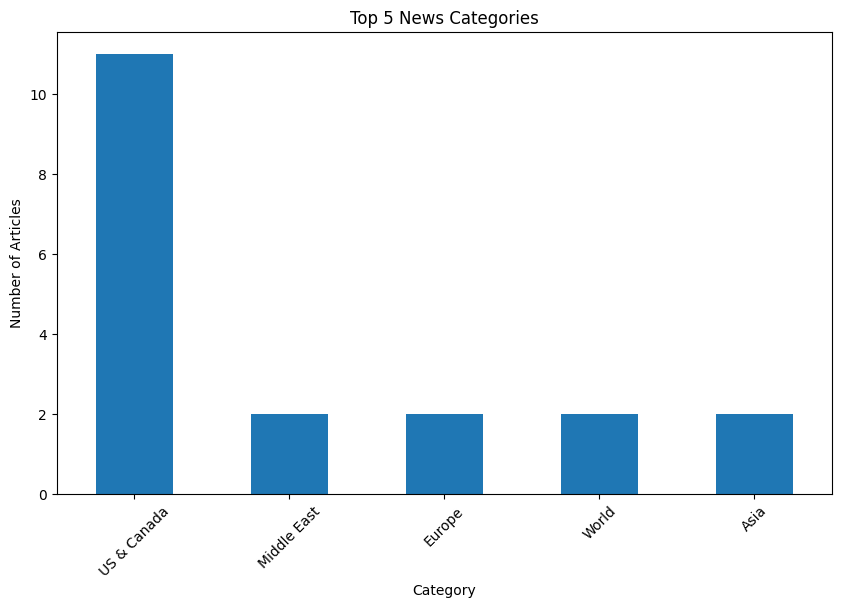

In [164]:
import matplotlib.pyplot as plt
# Plotting the top 5 most frequent news categories
top_categories = df['Category'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 5 News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [165]:
# Save data to CSV
df.to_csv('bbc_news_world.csv', index=False)
print("Data saved to bbc_news_world.csv")

Data saved to bbc_news_world.csv
